# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [296]:
import pandas as pd
import matplotlib

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the "correct" name

In [298]:
pd.read_csv("animals.csv")
df = pd.read_csv("animals.csv")


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [6]:
df.dtypes


animal    object
name      object
length     int64
dtype: object

In [7]:
df.shape

(6, 3)

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but not the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [63]:
df.head(n=3)

,animal,name,length,length_inch,cat,dog
0,cat,Anne,35,14.0,True,False
1,cat,Bob,45,18.0,True,False
2,dog,Egglesburg,65,26.0,False,True


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [13]:
df.sort_values(by='length').head(n=3)

,animal,name,length
4,cat,Charlie,32
0,cat,Anne,35
5,dog,Fontaine,35


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [27]:
#df["length"].mean(), df["length"].std()

#df["length"].mean() & df["length"].std()

df.describe().loc[['mean','std']]


,length
mean,43.666667
std,12.516656


## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [30]:
df.groupby(['animal']).size()


animal
cat    3
dog    3
dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [37]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [48]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [93]:
df['length_inch'] = df['length'] * 0.393701
df['length_inch'] = df['length_inch'].round()
df['length_inch']

0    14.0
1    18.0
2    26.0
3    20.0
4    13.0
5    14.0
Name: length_inch, dtype: float64

## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [95]:
cat = df[df['animal'] == 'cat']
dog = df[df['animal'] == 'dog']
animal

,animal,name,length,length_inch,cat,dog
2,dog,Egglesburg,65,26.0,False,True
3,dog,Devon,50,20.0,False,True
5,dog,Fontaine,35,14.0,False,True


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [79]:
df[(df['animal'] == 'cat') & (df['length_inch'] > 12)]

,animal,name,length,length_inch,cat,dog
0,cat,Anne,35,14.0,True,False
1,cat,Bob,45,18.0,True,False
4,cat,Charlie,32,13.0,True,False


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [108]:
cat.mean(), dog.mean()

(length         37.333333
 length_inch    15.000000
 cat             1.000000
 dog             0.000000
 dtype: float64, length         50.0
 length_inch    20.0
 cat             0.0
 dog             1.0
 dtype: float64)

## 13) If you didn't already, use `groupby` to do #12 all at once

In [129]:
df.groupby("animal").mean()

,length,length_inch,cat,dog
animal,,,,
cat,37.333333,15.0,True,False
dog,50.000000,20.0,False,True


## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

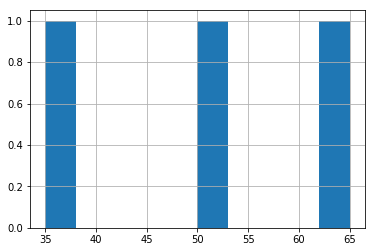

In [169]:
%matplotlib inline

dog['length'].hist()

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** You can set a custom size for your plot by sending it something like `figsize=(2,15)`

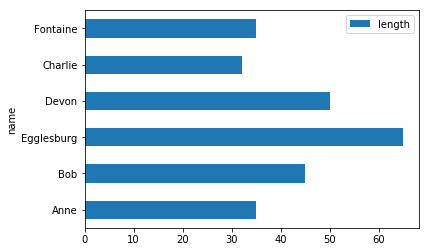

In [237]:
df.plot(kind='barh',x='name', y='length')



## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

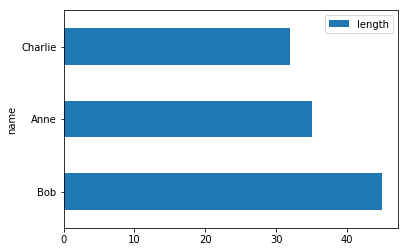

In [281]:
cat_sorted = cat.sort_values(by='length', ascending=False)
#cat_sorted
# df.plot(kind='barh',x=cat_sorted, y='length')

cat_sorted.plot(kind='barh', x='name', y='length')


## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

In [291]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

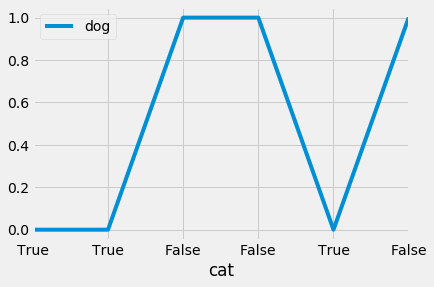

In [294]:
df.plot('cat','dog')